In [1]:
import pandas as pd
import yaml

with open('/Users/giogi/Desktop/Stage INFN/PID ITS/ITS_Cluster_Studies/PID ITS - Giorgio Alberto/code/configs/config.yml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

path = config['input']['data']
df = pd.read_parquet(path)

df.columns

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giogi/Desktop/Stage INFN/PID ITS/ITS_Cluster_Studies/PID ITS - Giorgio Alberto/code/configs/config.yml'

In [12]:
import pandas as pd
path1 = '/data/shared/ITS/ML/particles_pid_520143.parquet'
path2 = '/home/galucia/PID_ITS/data/TPC/Df_filtered_ITS2Cluster505673.parquet.gzip'

pmin = 0.55
pmax = 0.6

df_1 = pd.read_parquet(path1)
df_1.drop( df_1[df_1.particle == 4].index, inplace=True )

df_2 = pd.read_parquet(path2)
df_2.eval(f'nSigmaDeuAbs = abs(nSigmaDeu)', inplace=True)
df_2.drop( df_2[df_2.nSigmaDeuAbs < 1].index, inplace=True )

for i, df in enumerate([df_1, df_2]):
    print(f'\nDataframe {i}')
    if i == 0:
        df.eval('delta_p = (p - pTPC)/pTPC', inplace=True)
        df.query('p <= 50 and 20 < rofBC < 500 and tpcITSchi2 < 5 and nClusTPC > 100 and -0.2 < delta_p < 0.2', inplace=True)
    df.eval('meanClsize = (ClSizeL0 + ClSizeL1 + ClSizeL2 + ClSizeL3 + ClSizeL4 + ClSizeL5 + ClSizeL6)/7', inplace=True)
    df.query(f'{pmin} <= p < {pmax}', inplace=True)
    print('meanClsize')
    print(df.meanClsize.describe())

    for n in range(7):
        df1 = df.query(f'ClSizeL{n} == 7')
        print(f'\nClSizeL{n}')
        print(df1[f'ClSizeL{n}'].describe())



Dataframe 0
meanClsize
count    6788.000000
mean        1.644372
std         2.974294
min        -3.714286
25%        -1.428571
50%         2.714286
75%         4.000000
max         9.857142
Name: meanClsize, dtype: float64
       ClSizeL0  ClSizeL1  ClSizeL2  ClSizeL3  ClSizeL4  ClSizeL5  ClSizeL6  \
count       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
min         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25%         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
50%         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
75%         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
max         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       PattIDL0  PattIDL1  PattIDL2  ...  particle   pt  ptITS 

In [1]:
import pandas as pd
path = '/data/shared/ITS/ML/particles_pid_520147_itstpc.parquet'
df = pd.read_parquet(path)
df.columns



Index(['p', 'pt', 'pTPC', 'ptTPC', 'pITS', 'ptITS', 'rofBC', 'tgL',
       'clSizeCosLam', 'dedx', 'nSigmaDeu', 'nSigmaP', 'nSigmaK', 'nSigmaPi',
       'nSigmaE', 'tpcITSchi2', 'isPositive', 'nClusTPC', 'nClusITS',
       'ClSizeL0', 'SnPhiL0', 'TanLamL0', 'PattIDL0', 'ClSizeL1', 'SnPhiL1',
       'TanLamL1', 'PattIDL1', 'ClSizeL2', 'SnPhiL2', 'TanLamL2', 'PattIDL2',
       'ClSizeL3', 'SnPhiL3', 'TanLamL3', 'PattIDL3', 'ClSizeL4', 'SnPhiL4',
       'TanLamL4', 'PattIDL4', 'ClSizeL5', 'SnPhiL5', 'TanLamL5', 'PattIDL5',
       'ClSizeL6', 'SnPhiL6', 'TanLamL6', 'PattIDL6', 'particle'],
      dtype='object')

<AxesSubplot:>

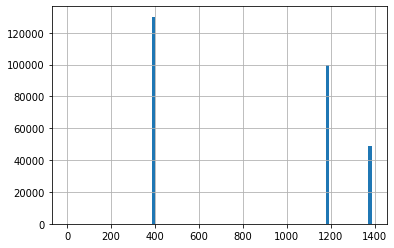

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/data/shared/ITS/ML/NEW/particles_pid_520143.parquet'
df = pd.read_parquet(path)
df.rofBC.hist(bins=100)
